## Actividad 6

In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import Curves2D
from matplotlib import colors
import matplotlib.ticker as ticker
from scipy import interpolate
from astropy.table import Table

https://plotly.com/python/getting-started/

**Fuente de latex para los gráficos. Para algunos caracteres especiale no funciona y hay que cambiar la configuración a False**

In [113]:
plt.rcParams['text.usetex'] = True

**Uso el script de Lucas Curves2D.py, que está subida al Dropbox**

In [2]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 6/' 
# path_win =

In [3]:
path_lin_fig = '/home/ramiro/Facultad/Tesis/Figuras/Actividad 6/'

Cargamos la tabla de datos que descargamos:

In [4]:
table   = pd.read_csv(path_lin+'Aperturas_RefL0100N1504_snap_28_aperture_30.dat')

In [5]:
DATA_sub = table[(table['Stars_Mass']>=1e10)].copy()
DATA_sub

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,NSF_Hydrogen,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200
0,9498012,28000000000002,28,2.220446e-16,6,8.913222,35.828056,54.839039,1.538708e+11,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,10.139413,30,1.307842e+11,0.000000,1411.312012,3.002119e+14
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,0.727174,0.004796,0.011342,0.841832,9.455478,30,6.641890e+10,0.823222,1411.312012,3.002119e+14
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,0.696796,0.010628,0.024796,12.094972,7.656161,30,1.183275e+11,10.984530,1411.312012,3.002119e+14
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,0.714222,0.007443,0.017283,1.334875,8.117089,30,2.024596e+10,1.322288,1411.312012,3.002119e+14
4,9519365,28000000000002,28,2.220446e-16,10,8.262937,36.454063,55.901993,4.833353e+10,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,8.520104,30,3.944613e+10,0.000000,1411.312012,3.002119e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,0.740806,0.002266,0.005160,0.456897,7.618259,30,1.191011e+10,0.433110,179.046371,6.129222e+11
13145,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,0.741599,0.002183,0.004858,1.192947,6.309848,30,1.063636e+10,1.192947,168.661011,5.124048e+11
13155,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,0.743705,0.001579,0.003758,0.506203,6.814752,30,1.192049e+10,0.506203,159.761032,4.354551e+11
13164,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,0.737761,0.002874,0.006602,0.686905,6.787498,30,1.124763e+10,0.604550,152.119400,3.759434e+11


In [6]:
data = pd.read_csv(path_lin+'Actividad_5_v2_Parte_2.dat')

In [7]:
DATA = data.copy()
DATA

,GalaxyID_test,GroupID_test,GalaxyID_V1,GalaxyID_V2,R_1,R_2,r_sep_1,r_sep_2,mu_1,mu_2,N_1,N_2,N_3
0,9498012,28000000000002,9532694,3461244,0.505941,0.518791,40.259414,48.797400,0.649263,0.125630,18,35,41
1,9508202,28000000000002,9562859,14910180,0.257705,0.463580,21.223224,33.711917,0.315459,0.823968,3,3,15
2,9512113,28000000000002,3467928,9554089,0.150475,0.231956,13.328678,18.674313,0.120308,0.314345,20,34,40
3,9517736,28000000000002,9537911,9542932,0.423763,0.677967,37.490817,56.695098,1.999591,1.722059,2,35,52
4,9519365,28000000000002,9542932,9539937,0.634224,0.952579,38.135130,67.823802,0.795587,0.615451,2,34,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,18478750,18181888,1.911730,3.737239,212.966353,260.881095,2.058146,2.369121,0,1,1
3634,10859653,28000000002570,9779252,9744960,1.526021,5.217671,148.669482,531.640719,2.014763,1.325153,0,1,1
3635,11104654,28000000002905,9034191,10942165,1.503464,2.124332,167.615303,244.177300,1.657043,0.965701,0,1,2
3636,11247394,28000000003127,18043220,13249045,2.053687,2.693730,123.996389,183.269247,4.079843,1.619644,0,0,3


In [8]:
merge = pd.merge(left=DATA_sub,right=DATA, left_on='GalaxyID', right_on='GalaxyID_test')

In [9]:
merge

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,GalaxyID_V2,R_1,R_2,r_sep_1,r_sep_2,mu_1,mu_2,N_1,N_2,N_3
0,9498012,28000000000002,28,2.220446e-16,6,8.913222,35.828056,54.839039,1.538708e+11,0.000000e+00,...,3461244,0.505941,0.518791,40.259414,48.797400,0.649263,0.125630,18,35,41
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,14910180,0.257705,0.463580,21.223224,33.711917,0.315459,0.823968,3,3,15
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,9554089,0.150475,0.231956,13.328678,18.674313,0.120308,0.314345,20,34,40
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,9542932,0.423763,0.677967,37.490817,56.695098,1.999591,1.722059,2,35,52
4,9519365,28000000000002,28,2.220446e-16,10,8.262937,36.454063,55.901993,4.833353e+10,0.000000e+00,...,9539937,0.634224,0.952579,38.135130,67.823802,0.795587,0.615451,2,34,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,18181888,1.911730,3.737239,212.966353,260.881095,2.058146,2.369121,0,1,1
3634,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,9744960,1.526021,5.217671,148.669482,531.640719,2.014763,1.325153,0,1,1
3635,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,10942165,1.503464,2.124332,167.615303,244.177300,1.657043,0.965701,0,1,2
3636,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,13249045,2.053687,2.693730,123.996389,183.269247,4.079843,1.619644,0,0,3


Creo la columna de la metalicidad componente star forming 

In [10]:
SF_O  = merge['SF_Oxygen']
SF_H  = merge['SF_Hydrogen']
SF_M  = merge['SF_Mass']
M_Star= merge['Stars_Mass']

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

merge['sf_metalicity'] = 12+np.log10(M_O_SF/(16*M_H_SF))
merge

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,R_1,R_2,r_sep_1,r_sep_2,mu_1,mu_2,N_1,N_2,N_3,sf_metalicity
0,9498012,28000000000002,28,2.220446e-16,6,8.913222,35.828056,54.839039,1.538708e+11,0.000000e+00,...,0.505941,0.518791,40.259414,48.797400,0.649263,0.125630,18,35,41,NaN
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,0.257705,0.463580,21.223224,33.711917,0.315459,0.823968,3,3,15,9.079824
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,0.150475,0.231956,13.328678,18.674313,0.120308,0.314345,20,34,40,9.246274
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,0.423763,0.677967,37.490817,56.695098,1.999591,1.722059,2,35,52,9.050028
4,9519365,28000000000002,28,2.220446e-16,10,8.262937,36.454063,55.901993,4.833353e+10,0.000000e+00,...,0.634224,0.952579,38.135130,67.823802,0.795587,0.615451,2,34,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,1.911730,3.737239,212.966353,260.881095,2.058146,2.369121,0,1,1,9.085429
3634,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,1.526021,5.217671,148.669482,531.640719,2.014763,1.325153,0,1,1,9.024783
3635,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,1.503464,2.124332,167.615303,244.177300,1.657043,0.965701,0,1,2,9.286851
3636,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,2.053687,2.693730,123.996389,183.269247,4.079843,1.619644,0,0,3,9.115270


## Graficar 12+log10(O/H) vs log10(Mstar) (scatter plot + medianas + percentiles 25th y 75th).

In [89]:
mask = (merge['sf_metalicity'].notna())
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [90]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

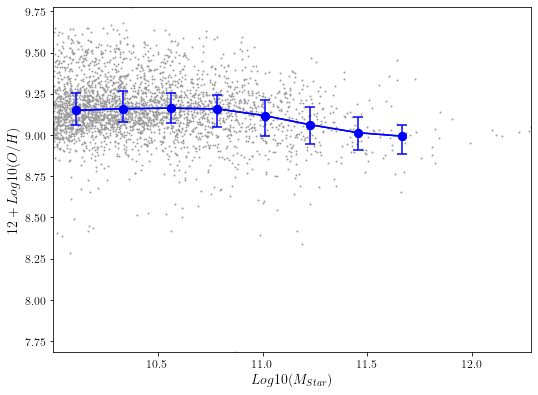

In [91]:
fig,ax=plt.subplots(figsize=(8,6))

xlim=(min(xvar),max(xvar))
ylim=(min(yvar),max(yvar))

xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'

ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=12)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(xvar,yvar,marker='o',s=0.8,c='0.6',label='Scatter plot')

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='o',markersize=8,linestyle='-',
           linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)

# leg1=ax.legend(edgecolor='0.1',loc='upper left',handlelength=4,fontsize=12)
# leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':13})

# ax.add_artist(leg1)
# plt.savefig('scatter_log(M)vs_metalicidad.png')


plt.show()

**Coloreado de scatter plot para número de vecinos a menos de 2Mpc**

In [92]:
parametro ='N_1'

In [93]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)&(merge['SubGroupNumber']!=0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [94]:
color = merge[parametro][mask].to_numpy()

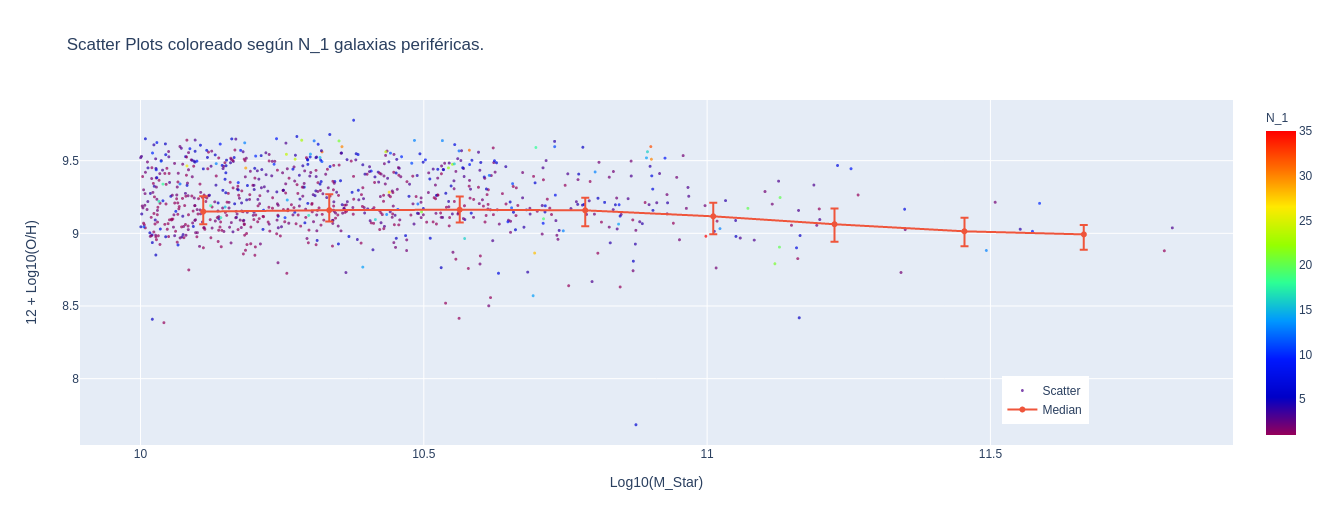

In [95]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+' galaxias periféricas.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )


fig.show()

**Coloreado de scatter plot para distancia del primer vecino**

In [18]:
parametro ='R_1'

In [19]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)&(merge['SubGroupNumber']!=0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [20]:
color = merge[parametro][mask].to_numpy()

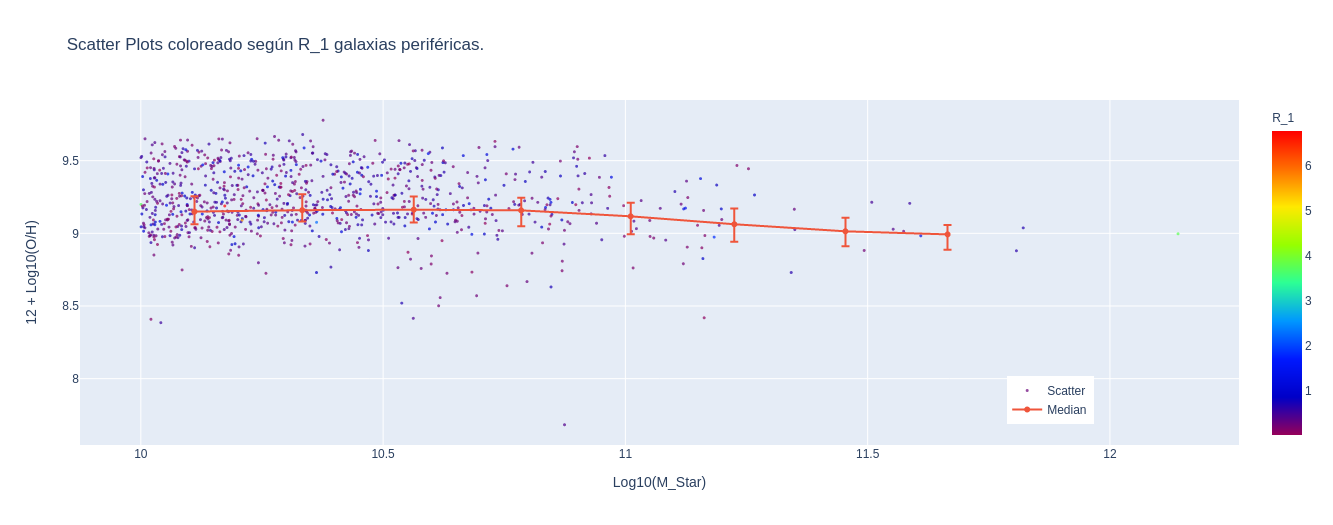

In [21]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+' galaxias periféricas.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

**Coloreado de scatter plot para distancia del segundo vecino**

In [22]:
parametro ='R_2'

In [23]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)&(merge['SubGroupNumber']!=0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [24]:
color = merge[parametro][mask].to_numpy()

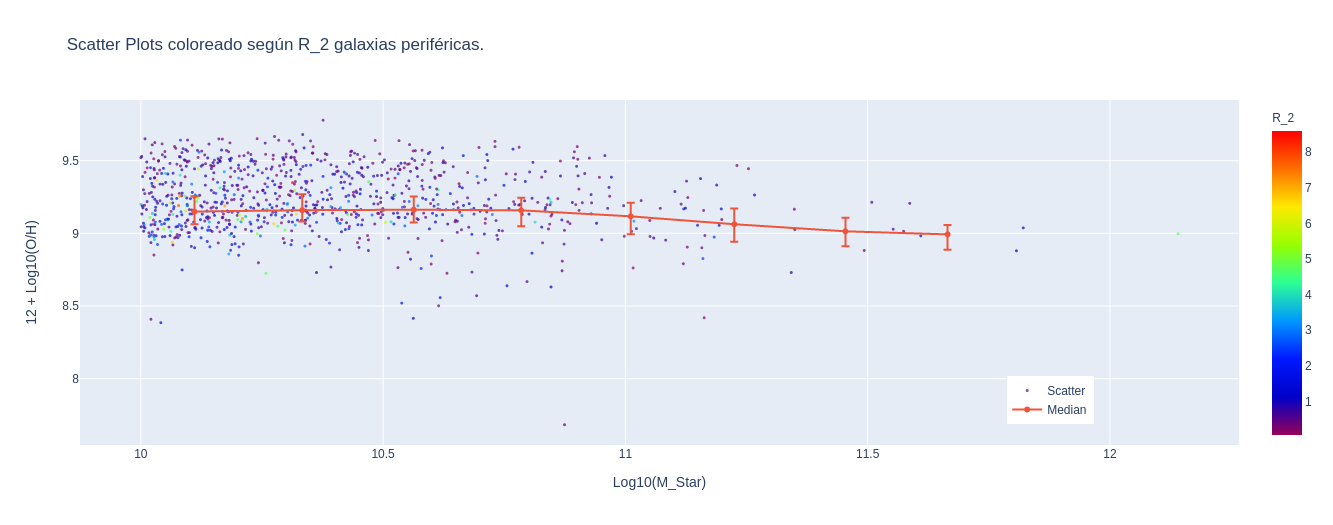

In [25]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+' galaxias periféricas.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

**Coloreado de scatter plot para el R_sep con el primer vecino**

In [26]:
parametro ='r_sep_1'

In [27]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)&(merge['SubGroupNumber']!=0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [28]:
color = merge[parametro][mask].to_numpy()

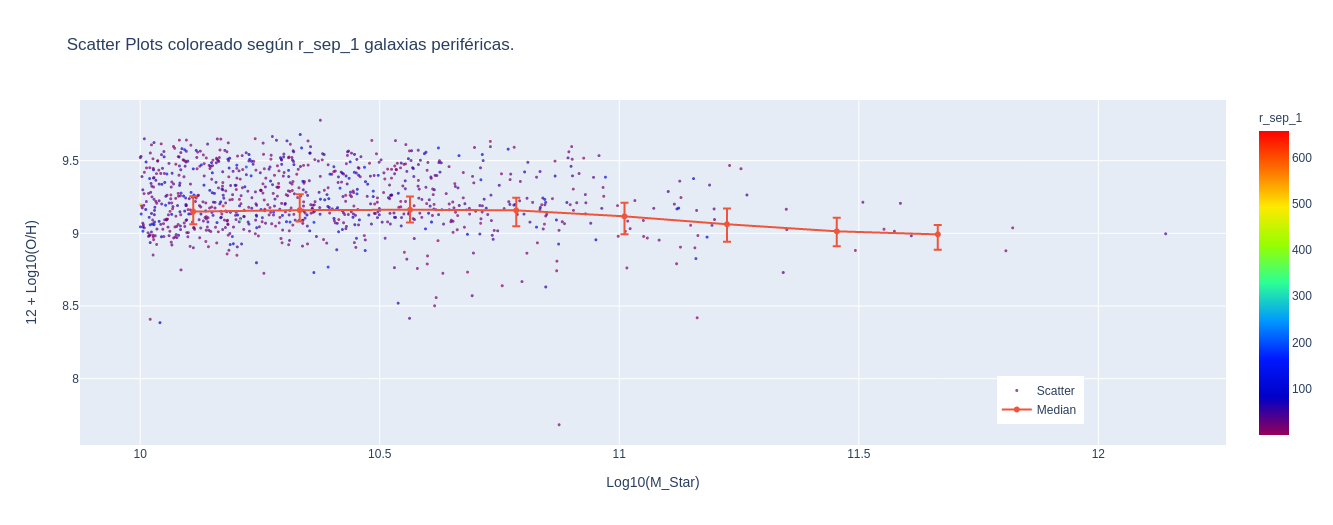

In [29]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+' galaxias periféricas.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

**Coloreado de scatter plot para el R_sep con el segundo vecino**

In [30]:
parametro ='r_sep_2'

In [31]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)&(merge['SubGroupNumber']!=0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [32]:
color = merge[parametro][mask].to_numpy()

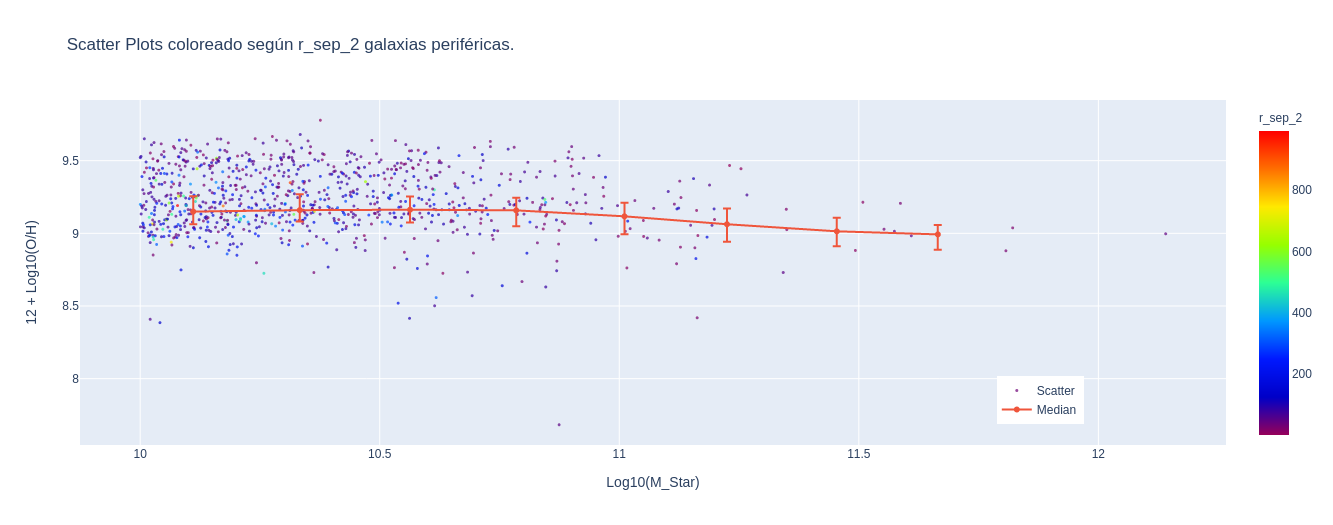

In [33]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+' galaxias periféricas.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

**Coloreado de scatter plot para el la relación entre masas con el primer vecino**

In [34]:
parametro ='mu_1'

In [35]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)&(merge['SubGroupNumber']!=0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [36]:
color = merge[parametro][mask].to_numpy()

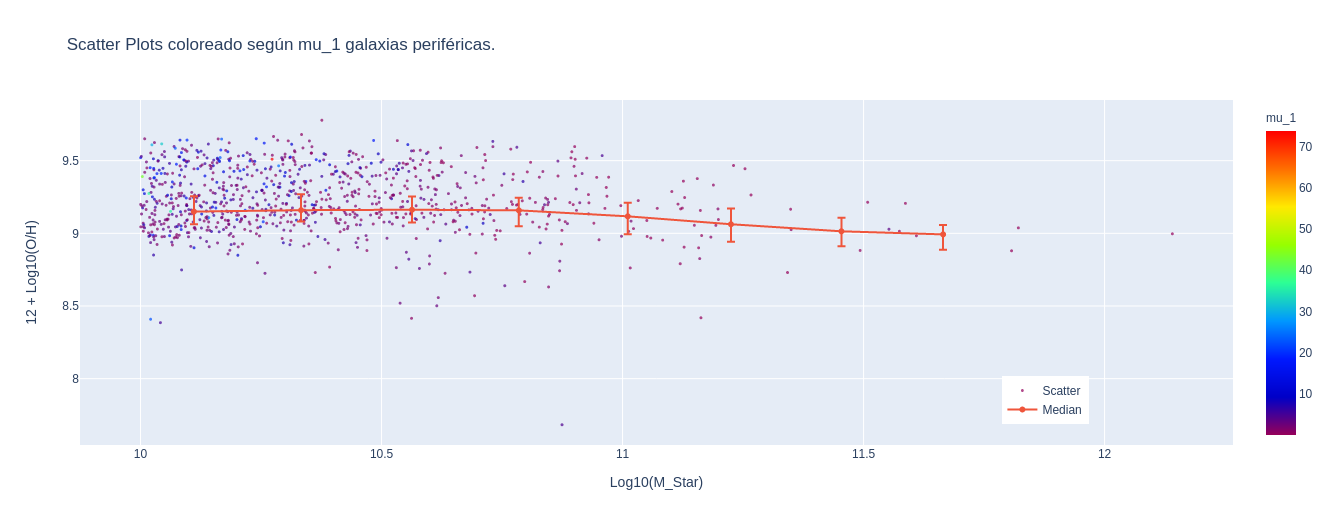

In [37]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+' galaxias periféricas.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

**Coloreado de scatter plot para el la relación entre masas con el segundo vecino**

In [38]:
parametro ='mu_2'

In [39]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)&(merge['SubGroupNumber']!=0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [40]:
color = merge[parametro][mask].to_numpy()

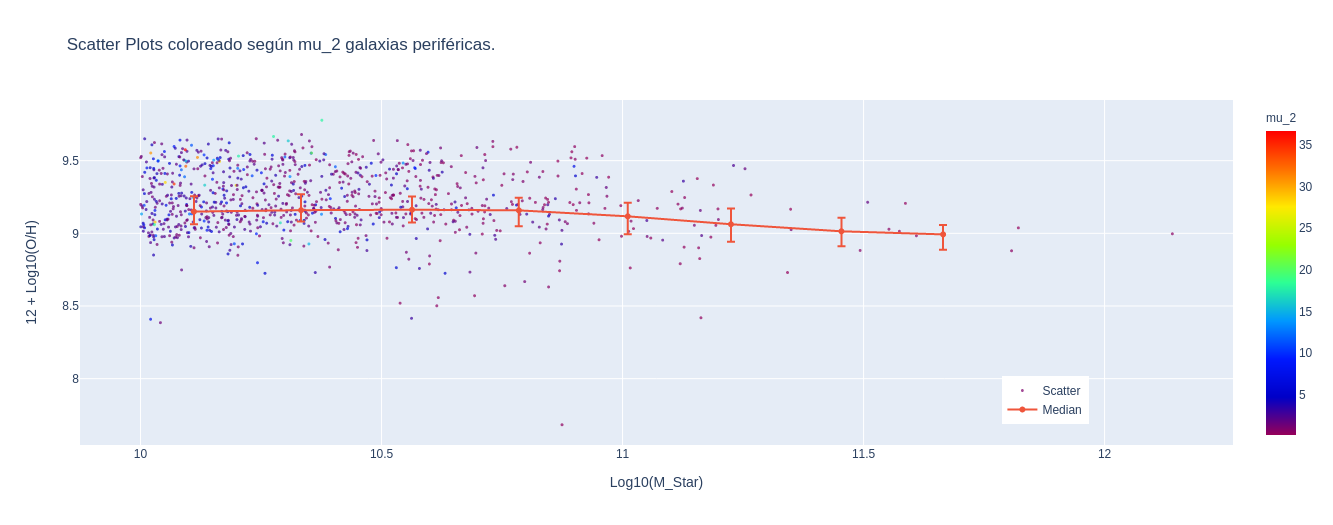

In [41]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
                                 color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=True,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots coloreado según '+parametro+' galaxias periféricas.')

fig.update_xaxes(title_text = 'Log10(M_Star)')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.2,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

Ahora vemos si los valores extremos de los parámtros se desvían de la media. 

In [42]:
parametro  ='SubGroupNumber'
parametro_2='mu_1'
cota_par   = 0
cota_par_2 = 0

In [43]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]==cota_par)&(merge[parametro_2]>cota_par_2)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [44]:
color = merge[parametro][mask].to_numpy()

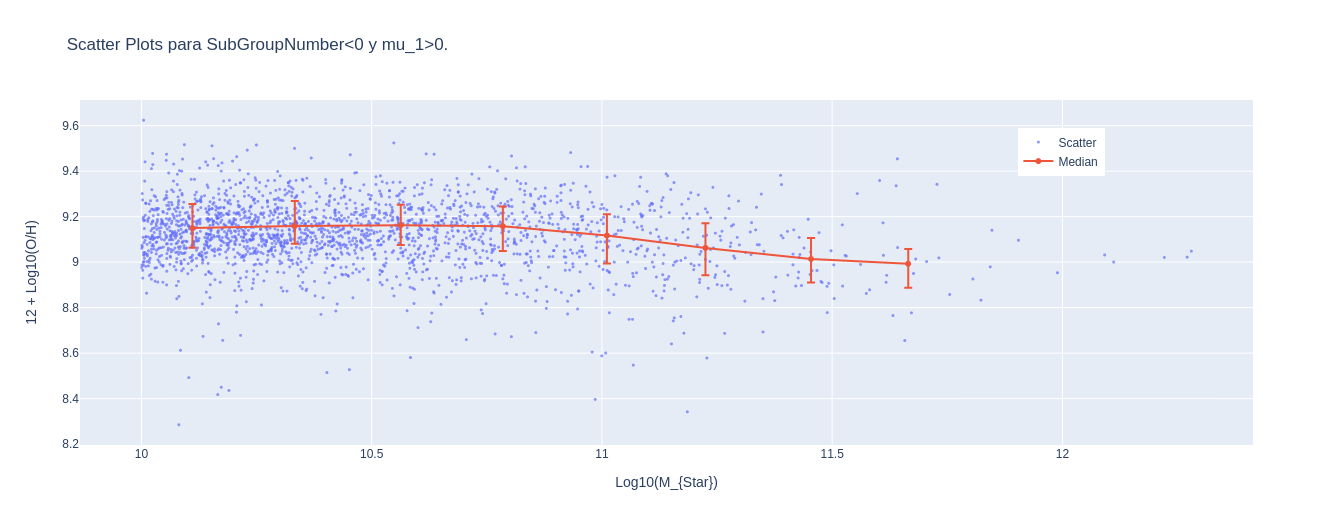

In [45]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
#                                  color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=False,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots para '+parametro+'<'+str(cota_par)+' y '+parametro_2+'>'+str(cota_par_2)+'.')

fig.update_xaxes(title_text = 'Log10(M_{Star})')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.92,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

In [46]:
parametro  ='N_2'
parametro_2='mu_1'
cota_par   = 10
cota_par_2 = 1

In [47]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>cota_par)&(merge[parametro_2]<cota_par_2)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [48]:
color = merge[parametro][mask].to_numpy()

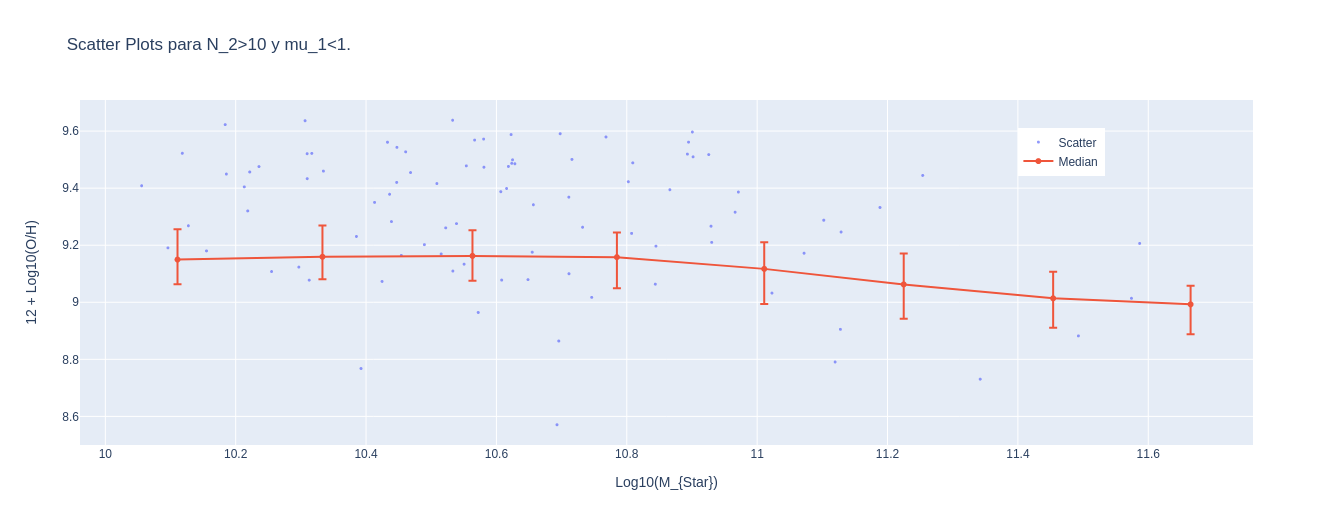

In [49]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
#                                  color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=False,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots para '+parametro+'>'+str(cota_par)+' y '+parametro_2+'<'+str(cota_par_2)+'.')

fig.update_xaxes(title_text = 'Log10(M_{Star})')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.92,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

In [50]:
parametro  ='N_2'
parametro_2='mu_1'
cota_par   = 30
cota_par_2 = 5

In [51]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>cota_par)&(merge[parametro_2]>cota_par_2)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [52]:
color = merge[parametro][mask].to_numpy()

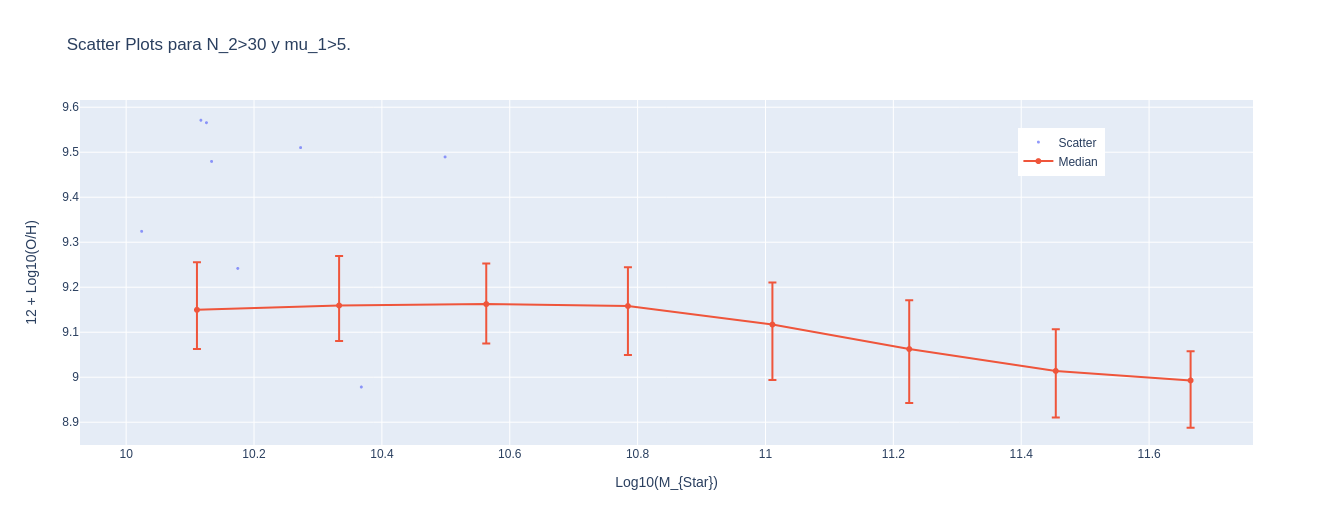

In [53]:
fig = go.Figure(data=[go.Scatter(x = xvar,y = yvar,
                                 name="Scatter",
                                 mode='markers',
                                 marker=dict(
                                 size=3,
#                                  color=color,
                                 opacity=0.7,
                                 colorscale='Rainbow', 
                                 showscale=False,
                                 colorbar=dict(title=parametro)
                                 )
                    ),go.Scatter(x = xmedian,y = ymedian,
                                 name="Median",
                                 error_y=dict(type='data',
                                 symmetric=False,
                                 array=yerror[1],
                                 arrayminus=yerror[0])
    )])

fig.update_layout(title='Scatter Plots para '+parametro+'>'+str(cota_par)+' y '+parametro_2+'>'+str(cota_par_2)+'.')

fig.update_xaxes(title_text = 'Log10(M_{Star})')

fig.update_yaxes(title_text = '12 + Log10(O/H)')

# fig.update_layout(showlegend=False)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.92,
    xanchor="left",
    x=0.8
))

fig.update_layout(
    autosize=False,
    width=650,
    height=525
    )

fig.show()

## Color Maps

**Tranformamos el dataframe en Table de astropy**

In [54]:
astro_merge = Table(data=np.array(merge),names=merge.keys())

In [55]:
# Condiciones para seleccionar muestra
mask=(astro_merge['Stars_Mass']>=1e10)&(astro_merge['sf_metalicity']>0) 

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [56]:
# Parámetro que colorea
parametro= 'N_3'

# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$\log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(M_{O}/M_{H})$'

In [57]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=parametro

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-58-1b393b396324>:79: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



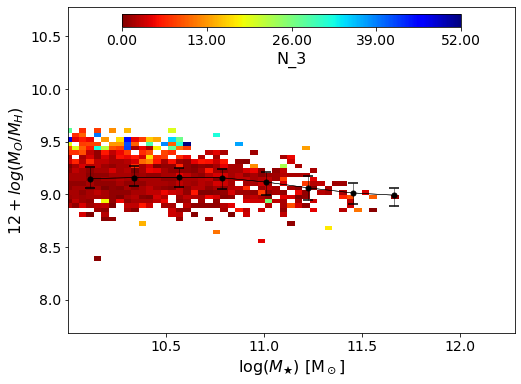

In [58]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=16)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=16)
ax.set_ylabel(ylabel,fontsize=16)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot),max(yplot)+1
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=14)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Guardar la figura, si es necesario
# plt.savefig('Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

In [59]:
colors

<module 'matplotlib.colors' from '/home/ramiro/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py'>

## Segunda parte

**Vamos a hacer un análisis cuantitativo respecto de algunas cantidades tales como $N_{2}$, $\mu_{1,2}$, etc para ver si diferentes valores de ellas se alejan de la media entre la relación masa vs metalicidad. 
Para ello primero vamos rellenar los valores discretos de la media y su error para poder calcular los residuos respecto de la mediana y así realizar un histograma de las gaáxias para luego aplicarle algún test de hipótesis.**

Ya tenemos los valores discretos de la mediana

In [244]:
mask = (merge['sf_metalicity'].notna())
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()

In [245]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

In [246]:
x      = xmedian
y      = ymedian

f      = interpolate.interp1d(x, y)
f_err_u= interpolate.interp1d(x, yerror[1])
f_err_d= interpolate.interp1d(x, yerror[0])

**Valores continuos de la función interpoladora para la mediana junto con sus errores**

In [247]:
xnew = np.arange(min(x),max(x) , 0.0001)
ynew = f(xnew)   # use interpolation function returned by `interp1d`

y_error_n=[[],[]]
y_error_n[1] = f_err_u(xnew)
y_error_n[0] = f_err_d(xnew)

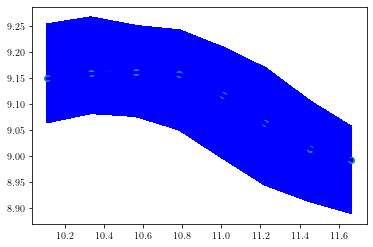

In [248]:
plt.plot(x, y, 'o', xnew, ynew, '-')

plt.errorbar(xnew,ynew,yerr=y_error_n,c='b',marker='o',markersize=1,linestyle='-',linewidth=1.5)

plt.show()

**Hacemos un scatter plot de la masa vs metalicidad junto con la banda media. Podemos elegir algún parámetro para ver como cambia la distribución.
Tuve que poner un filtro para que las galáxias se ajusten al valor mínimo y máximo de la media.**

In [249]:
parametro ='r_sep_1'

In [250]:
mask = (merge['sf_metalicity'].notna())&(merge[parametro]>0)&(np.log10(merge['Stars_Mass'])>min(xmedian))&(np.log10(merge['Stars_Mass'])<max(xmedian))#&(merge['SubGroupNumber']==0)
xvar = np.log10(merge['Stars_Mass'])[mask].to_numpy()
yvar = merge['sf_metalicity'][mask].to_numpy()
zvar = merge[parametro][mask].to_numpy()

**Separamos las galáxias según su ubucación respecto a la banda media**

In [251]:
gal_sup =[]
gal_inf =[]
gal_mean=[]

for i in np.arange(len(xvar)):
    sup = f(xvar[i]) + f_err_u(xvar[i])- yvar[i]
    inf = f(xvar[i]) - f_err_d(xvar[i])- yvar[i]
    if sup*inf<0:
        gal_mean.append(i)
    elif abs(sup)<abs(inf):
        gal_sup.append(i)
    else: gal_inf.append(i)

In [252]:
residuos = np.ones_like(xvar,dtype=float)

for i in np.arange(len(xvar)):
    residuos[i] = -(f(xvar[i]) - yvar[i])

In [253]:
xvar_sup = np.ones_like(gal_sup,dtype=float)
xvar_inf = np.ones_like(gal_inf,dtype=float)
xvar_mean= np.ones_like(gal_mean,dtype=float)

yvar_sup = np.ones_like(gal_sup,dtype=float)
yvar_inf = np.ones_like(gal_inf,dtype=float)
yvar_mean= np.ones_like(gal_mean,dtype=float)

zvar_sup = np.ones_like(gal_sup,dtype=int)
zvar_inf = np.ones_like(gal_inf,dtype=int)
zvar_mean= np.ones_like(gal_mean,dtype=int)

for i in np.arange(len(gal_sup)):
    xvar_sup[i] = xvar[gal_sup[i]]
    yvar_sup[i] = yvar[gal_sup[i]]
    zvar_sup[i] = zvar[gal_sup[i]]
    
for i in np.arange(len(gal_inf)):
    xvar_inf[i] = xvar[gal_inf[i]]
    yvar_inf[i] = yvar[gal_inf[i]]
    zvar_inf[i] = zvar[gal_inf[i]]
    
for i in np.arange(len(gal_mean)):
    xvar_mean[i] = xvar[gal_mean[i]]
    yvar_mean[i] = yvar[gal_mean[i]]
    zvar_mean[i] = zvar[gal_mean[i]]

**Scatter de residuos en función de parámetro.**

In [254]:
xvar = zvar
yvar = residuos

In [255]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

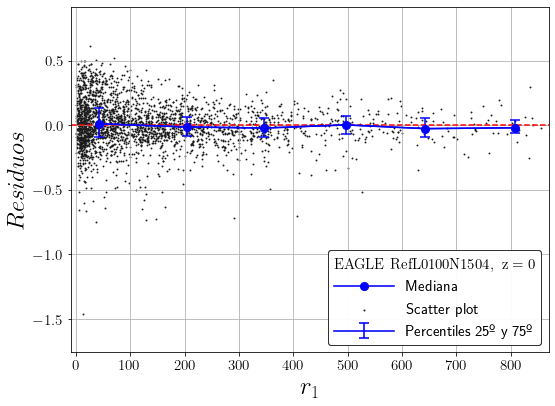

In [256]:
fig,ax=plt.subplots(figsize=(8,6))

xlim=(min(zvar)-10,max(zvar)-600)
ylim=(min(residuos)-0.3,max(residuos)+0.3)

xlabel=r'$r_{1}$'
ylabel=r'$Residuos$'

ax.set_xlabel(xlabel,fontsize=25)
ax.set_ylabel(ylabel,fontsize=25)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=15)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(zvar,residuos,marker='o',s=0.8,c='0.1',label='Scatter plot')

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Mediana')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='',markersize=8,linestyle='-',
           linewidth=1.5,label='Percentiles 25º y 75º',capsize=5,capthick=1.5)

leg1=ax.legend(edgecolor='0.1',loc='lower right',handlelength=4,fontsize=15)
leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':15})

# plt.title('Scatter Plots separando según la ubicación de la media.')

ax.add_artist(leg1)

plt.grid()    
plt.hlines(0,xlim[0],xlim[1],colors = 'r',linestyles='dashed')


# plt.savefig(path_lin_fig+'residuos_r_1.png')
plt.show()

**Color maps para los residuos**

In [257]:
map_c = {'r_sep_2':merge['r_sep_2'][mask].to_numpy(),'residuos':residuos,str(parametro):zvar}

In [258]:
map_c = pd.DataFrame(map_c)
map_c_color = Table(data= np.array(map_c),names= map_c.keys())

In [259]:
# Condiciones para seleccionar muestra
# mask=(astro_merge['Stars_Mass']>=1e10)&(astro_merge['sf_metalicity']>0)

data={}
for key in map_c_color.keys():
    data[key] = map_c_color[key]

In [260]:
# Variables (ejes) a graficar
xplot = data[parametro]
yplot = data['residuos']

xlabel= r'$r_{1}$'
ylabel= r'$Residuos$'

In [261]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data['r_sep_2']

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$r_{2}$'

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-263-176b2a38c19c>:79: MatplotlibDeprecationWarning:

You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))



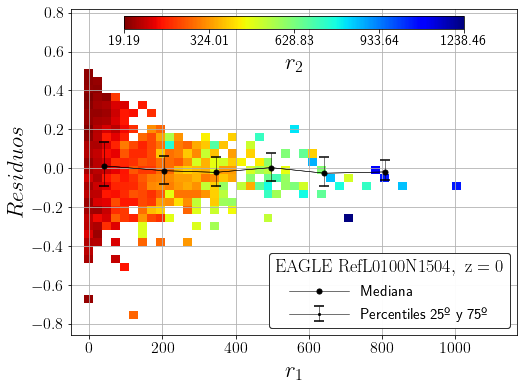

In [263]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=23)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=23)
ax.set_ylabel(ylabel,fontsize=23)

xmin,xmax=min(xplot)-50,max(xplot)-300
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot)+0.6,max(yplot)+0.2
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=16)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Mediana')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Percentiles 25º y 75º',capsize=5,capthick=1.5)

leg1=ax.legend(edgecolor='0.1',loc='lower right',handlelength=4,fontsize=15)
leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':18})

ax.add_artist(leg1)
plt.grid() 

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'map_color_residuos_r_1.png')
   
plt.show()

# Algunos histogramas

In [70]:
# np.linspace(int(min(zvar)),int(max(zvar)),len(y_error_n[1]))

In [71]:
# zvar_sup

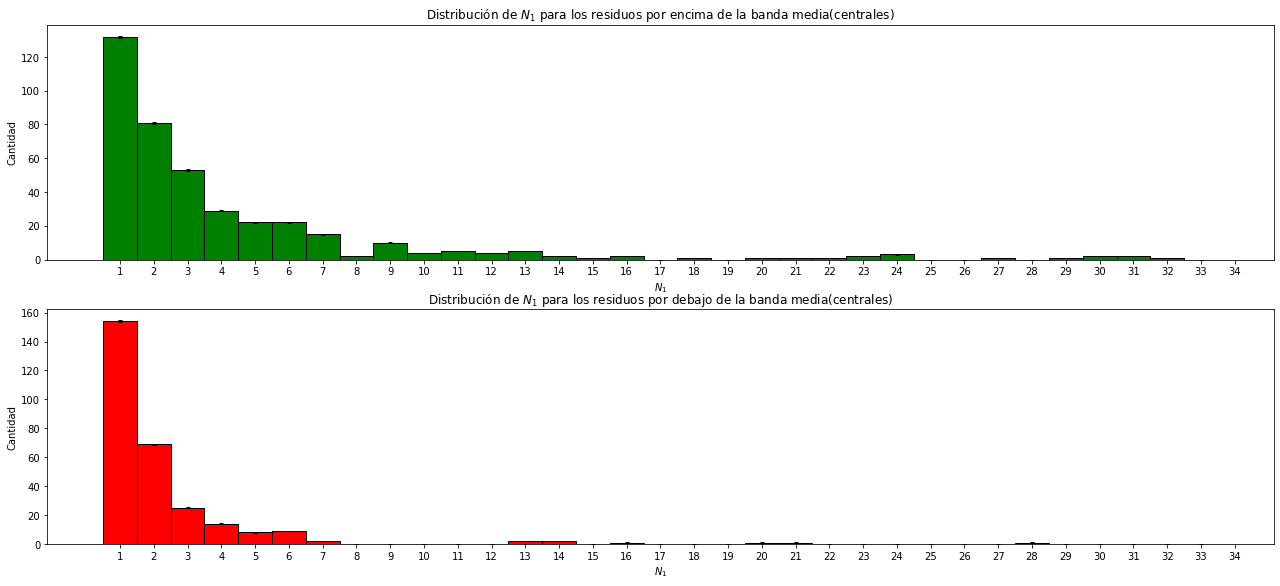

In [72]:
figure, axes = plt.subplots(2,figsize=(18,8))

bins = np.arange(1,max(zvar),1)
h_sup,b = np.histogram(zvar_sup,bins,density=False)
error_sup = np.sqrt(h_sup/len(zvar_sup))
axes[0].bar(b[:-1],height=h_sup,width =1,color='g',edgecolor='k',yerr=error_sup,capsize=2)
axes[0].set_title('Distribución de $N_{1}$ para los residuos por encima de la banda media(centrales)')
axes[0].set_xlabel(r'$N_{1}$')
axes[0].set_ylabel('Cantidad')
axes[0].set_xticks(bins)

figure.tight_layout()

bins = np.arange(1,max(zvar),1)
h_inf,b = np.histogram(zvar_inf,bins,density=False)
error_inf = np.sqrt(h_inf/len(zvar_inf))
axes[1].bar(b[:-1],height=h_inf,width =1,color='r',edgecolor='k',yerr=error_inf,capsize=2)
axes[1].set_title('Distribución de $N_{1}$ para los residuos por debajo de la banda media(centrales)')
axes[1].set_xlabel(r'$N_{1}$')
axes[1].set_ylabel('Cantidad')
axes[1].set_xticks(bins)


# figure.savefig(path_lin_fig+'distribuciones_N_1(centrales).png',dpi=300)
plt.show()

In [73]:
print(sum(h_sup))
print(sum(h_inf))

405
289


In [74]:
n=10
prob_sup=0
prob_inf=0

for i in np.arange(n+1):
    prob_sup += h_sup[i]
    
for i in np.arange(n+1):
    prob_inf += h_inf[i]
    
print('Probabilidad de agarrar una galáxia por sup a la media con más de '+str(n)+' vecinos:',1-prob_sup)
print('Probabilidad de agarrar una galáxia por inf a la media con más de '+str(n)+' vecinos:',1-prob_inf)

Probabilidad de agarrar una galáxia por sup a la media con más de 10 vecinos: -374
Probabilidad de agarrar una galáxia por inf a la media con más de 10 vecinos: -280


**Vamos a hacer color maps para los residuos coloreando según distintos parámetros**

In [75]:
astro_merge = Table(data=np.array(merge),names=merge.keys())

In [76]:
# Condiciones para seleccionar muestra
mask=(astro_merge['Stars_Mass']>=1e10)&(astro_merge['sf_metalicity']>0) 

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [77]:
# Parámetro que colorea
parametro= 'R_1'

# Variables (ejes) a graficar
xplot = zvar
yplot = residuos

xlabel= r'$\log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(M_{O}/M_{H})$'

In [78]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color = data[parametro]

# Estadístico a usar ('counts','mean','median')
statistic='mean'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=parametro

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

IndexError: boolean index did not match indexed array along dimension 0; dimension is 3093 but corresponding boolean dimension is 1171

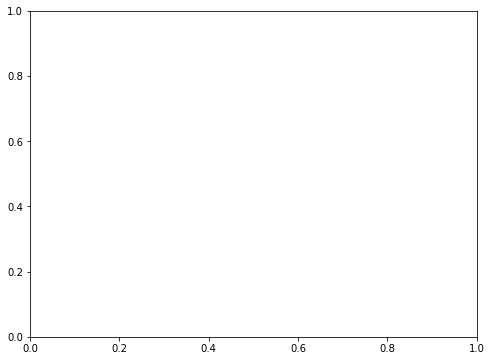

In [79]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=16)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=14)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=16)
ax.set_ylabel(ylabel,fontsize=16)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot),max(yplot)+1
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=14)

# ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Median relation')

# ax.errorbar(xmedian,ymedian,yerr=yerror,
#            c='k',marker='o',markersize=2,linestyle='-',
#            linewidth=0.5,label='Median relation',capsize=5,capthick=1.5)

# Guardar la figura, si es necesario
# plt.savefig('Mstar_matalicidad_'+str(parametro)+'_RefL0100N1504_snap28.png')
    
plt.show()

**Distribución de cantidad de vecinos para galaxias que no tienen definida su metalicidad**

In [80]:
parametro = 'N_2'

In [81]:
mask = (merge['sf_metalicity'].isna())

kvar = merge[parametro][mask].to_numpy()

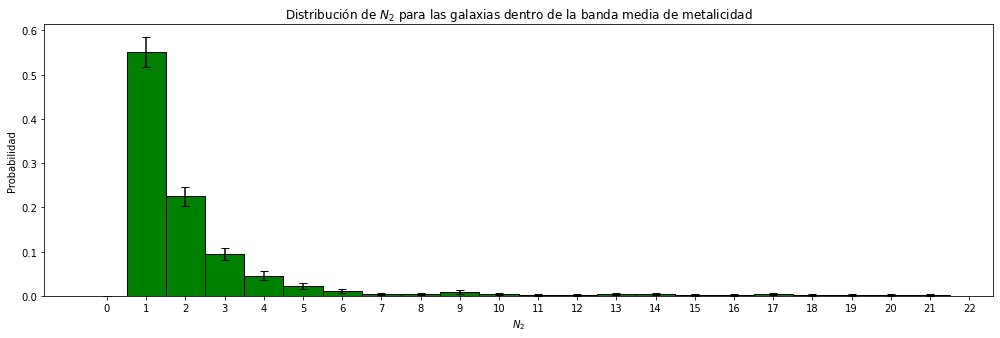

In [82]:
figure, axes = plt.subplots(1,figsize=(17,5))

bins = np.arange(0,max(zvar_mean)+2,1)
h,b = np.histogram(zvar_mean,bins,density=True)
error = np.sqrt(h/len(zvar_mean))
axes.bar(b[:-1],height=h,width =1,color='g',edgecolor='k',yerr=error,capsize=4)
axes.set_title('Distribución de $N_{2}$ para las galaxias dentro de la banda media de metalicidad')
axes.set_xlabel(r'$N_{2}$')
axes.set_ylabel('Probabilidad')
axes.set_xticks(bins)

# figure.savefig('distribuciones_N_2(mean_metalicidad).png',dpi=300)

plt.show()

## Tercera parte

   Separar a toda la muestra de galaxias en 3 submuestras con la misma cantidad de galaxias.  Para hacer esto, se pueden usar como cortes los percentiles 33 y 66 de N_2.  Ver la rutina “numpy.percentile”.

   ​​Para cada una de estas submuestras, calcular, como siempre, la MZR mediana con barras de error.

   ​​Graficar en la misma figura las 3 curvas indicadas en 2).

​​

In [83]:
parametro = 'N_1'

In [84]:
per = np.percentile(merge[parametro],[33.3,66.6])
per

array([0., 1.])

In [85]:
mask = [0.0,0.0,0.0]
mask[0] = (merge[parametro]<=per[0])&(merge['sf_metalicity'].notna())
mask[1] = (merge[parametro]>per[0])&(merge[parametro]<=per[1])&(merge['sf_metalicity'].notna())
mask[2] = (merge[parametro]>per[1])&(merge['sf_metalicity'].notna())

In [86]:
color=['b','k','r']

In [87]:
xvar    = []
yvar    = []
xmedian = []
ymedian = []
xerror  = []
yerror  = []
elements= []
ax      = []

for i in np.arange(len(mask)):

    xvar.append(np.log10(merge['Stars_Mass'])[mask[i]].to_numpy())
    yvar.append(merge['sf_metalicity'][mask[i]].to_numpy())

    nbins=10            # Numero de bins en variable x a usar para dividir la muestra
    perc_low=25.        # Percentil a usar como cota inferior de error
    perc_high=75.       # Percentil a usar como cota superior de error
    min_count=10        # Mínima cantidad de elementos para considerar en un bin

    xmedia,ymedia,xerro,yerro,element=Curves2D.median_curve(xvar[i],yvar[i],bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)
    xmedian.append(xmedia)
    ymedian.append(ymedia)
    xerror.append(xerro)
    yerror.append(yerro)
    elements.append(element)



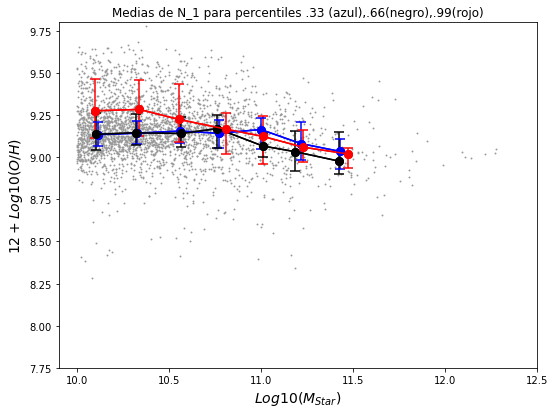

In [88]:
fig,ax=plt.subplots(figsize=(8,6))



xlabel=r'$Log10(M_{Star})$'
ylabel=r'$12 + Log10(O/H)$'
    
xmin,xmax=9.9,12.5
ax.set_xlim(xmin,xmax)

ymin,ymax=7.75,9.8
ax.set_ylim(ymin,ymax)
 
ax.set_xlabel(xlabel,fontsize=14)
ax.set_ylabel(ylabel,fontsize=14)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)


for i in np.arange(len(mask)):
    
    ax.scatter(xvar[i],yvar[i],marker='o',s=0.8,c='0.6',label='Scatter plot')

    ax.plot(xmedian[i],ymedian[i],c=color[i],marker='o',ms=8,linestyle='-',linewidth=1.5,label='Median relation')

    ax.errorbar(xmedian[i],ymedian[i],yerr=yerror[i],
                  c=color[i],marker='o',markersize=8,linestyle='-',
                      linewidth=1.5,label='Median relation',capsize=5,capthick=1.5)


    
# leg1=ax.legend(edgecolor='0.1',loc='lower right',handlelength=4,fontsize=12)
ax.set_title(r'Medias de '+str(parametro)+' para percentiles .33 (azul),.66(negro),.99(rojo)')


# ax.add_artist(leg1)
# plt.savefig('scatter_log(M)vs_metalicidad_(medianas_'+str(parametro)+').png')

plt.show()